<a href="https://colab.research.google.com/github/januarfahrisal1/AVD2_januarfahrisal_221031023/blob/main/UTS_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study Unsupervised Learning Menggunakan Dataset Prediksi Penyakit Terkait Cuaca

Januar Fahrizal

221031023

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# 3. Load dataset
file_path = '/content/drive/MyDrive/Cuaca.csv'
df = pd.read_csv(file_path)

In [ ]:
# 4. Tampilkan beberapa data awal
print("Data sample:")
print(df.head())

Data sample:
   Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0    4       1           25.826  0.740000           8.289000       1   
1   55       0           21.628  0.600000          15.236000       0   
2   45       0           13.800  0.817083           4.291992       0   
3    6       0           37.254  0.610000          18.009000       1   
4   70       0           18.162  0.870000          17.916000       0   

   joint_pain  abdominal_pain  high_fever  chills  ...  facial_pain  \
0           0               0           0       0  ...            0   
1           0               0           0       1  ...            0   
2           0               0           0       0  ...            0   
3           0               0           1       0  ...            0   
4           0               0           0       0  ...            1   

   shortness_of_breath  reduced_smell_and_taste  skin_irritation  itchiness  \
0                    1                        0 

In [ ]:
# 5. Pilih fitur yang relevan untuk clustering
weather_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
symptom_features = [
    'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
    'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
    'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
    'back_pain', 'knee_ache'
]
features = weather_features + symptom_features
X = df[features]
print(X)


      Temperature (C)  Humidity  Wind Speed (km/h)  nausea  joint_pain  \
0           25.826000  0.740000           8.289000       1           0   
1           21.628000  0.600000          15.236000       0           0   
2           13.800000  0.817083           4.291992       0           0   
3           37.254000  0.610000          18.009000       1           0   
4           18.162000  0.870000          17.916000       0           0   
...               ...       ...                ...     ...         ...   
5195        21.714000  0.870000           5.450000       0           1   
5196        10.491000  0.920000           9.165000       0           0   
5197        19.942824  0.744583           9.305129       0           0   
5198        20.069000  0.850000          17.971000       0           0   
5199        38.021000  0.750000          18.300000       0           0   

      abdominal_pain  high_fever  chills  facial_pain  shortness_of_breath  \
0                  0           0 

In [ ]:
# 6. Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X

,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
0,25.826000,0.740000,8.289000,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,21.628000,0.600000,15.236000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,13.800000,0.817083,4.291992,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,37.254000,0.610000,18.009000,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,18.162000,0.870000,17.916000,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,21.714000,0.870000,5.450000,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5196,10.491000,0.920000,9.165000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5197,19.942824,0.744583,9.305129,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5198,20.069000,0.850000,17.971000,0,0,1,0,0,0,1,0,0,0,0,0,0,0


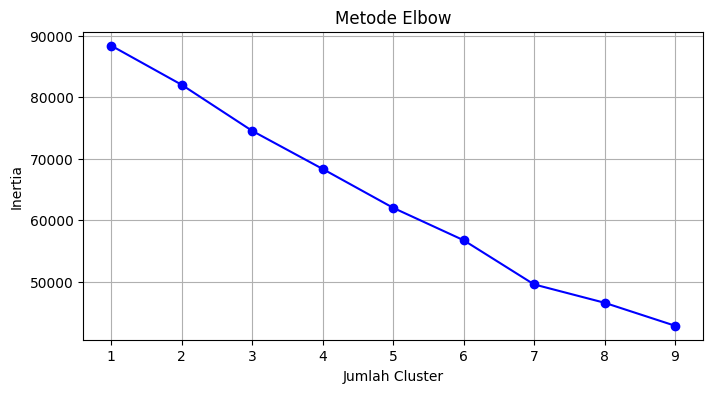

In [ ]:
# 7. Elbow Method - cari jumlah cluster optimal
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.grid()
plt.show()


In [ ]:
# 8. Terapkan KMeans Clustering (misalnya k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


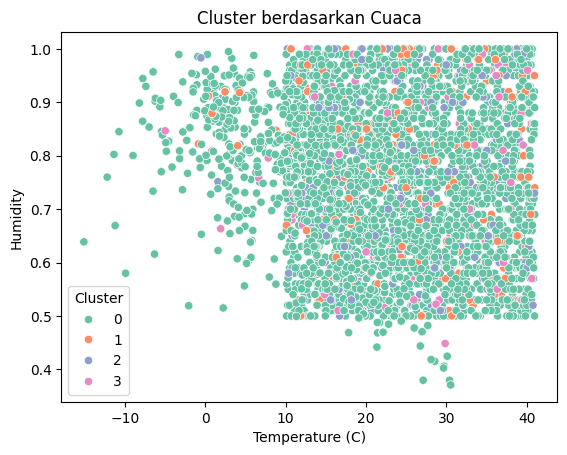

In [ ]:
# 9. Visualisasi Clustering (2D)
sns.scatterplot(data=df, x='Temperature (C)', y='Humidity', hue='Cluster', palette='Set2')
plt.title('Cluster berdasarkan Cuaca')
plt.show()

In [ ]:
# 10. Analisis hasil cluster
print("\nRata-rata tiap fitur per cluster:")
print(df.groupby('Cluster')[features].mean())



Rata-rata tiap fitur per cluster:
         Temperature (C)  Humidity  Wind Speed (km/h)    nausea  joint_pain  \
Cluster                                                                       
0              19.456891  0.743362          10.695549  0.154799     0.07563   
1              22.948018  0.769258          10.729647  0.400000     0.00000   
2              23.694013  0.740996          10.784678  0.000000     0.00000   
3              22.765618  0.752873          10.936824  0.000000     0.00000   

         abdominal_pain  high_fever    chills  facial_pain  \
Cluster                                                      
0               0.00000    0.116984  0.063689     0.000000   
1               0.77037    0.000000  0.144444     0.000000   
2               0.00000    0.000000  0.000000     0.720472   
3               0.00000    0.000000  0.000000     0.000000   

         shortness_of_breath  reduced_smell_and_taste  skin_irritation  \
Cluster                                    

In [ ]:
# 11. Tambahan: Cek sebaran prognosis tiap cluster
print("\nDistribusi prognosis di tiap cluster:")
print(df.groupby(['Cluster', 'prognosis']).size().unstack(fill_value=0))


Distribusi prognosis di tiap cluster:
prognosis  Arthritis  Common Cold  Dengue  Eczema  Heart Attack  Heat Stroke  \
Cluster                                                                        
0                311          321     322     173           782          338   
1                  0            0       0       0           231            0   
2                  0            0       0       0             0            0   
3                  0            0       0     154             0            0   

prognosis  Influenza  Malaria  Migraine  Sinusitis  Stroke  
Cluster                                                     
0                658      291       941         56     329  
1                  0       39         0          0       0  
2                  0        0         0        254       0  
3                  0        0         0          0       0  


🧠 Kesimpulan Case Study Unsupervised Learning: Clustering Penyakit Terkait Cuaca
✅ Tujuan
Studi ini bertujuan untuk mengelompokkan data penyakit berdasarkan fitur cuaca (seperti suhu, kelembapan, dan kecepatan angin) serta gejala, tanpa menggunakan label penyakit (prognosis) secara langsung saat proses pelatihan (unsupervised learning).

📊 Hasil Clustering (K = 4)
Distribusi prognosis per cluster menunjukkan bahwa masing-masing cluster berhasil mengelompokkan penyakit-penyakit tertentu yang memiliki pola gejala dan cuaca serupa.

🔍 Analisis Per Cluster
Cluster 0 (Mayoritas)
Jumlah Data: Cluster terbesar

Penyakit Dominan:

Migraine (941 kasus)

Heart Attack (782 kasus)

Influenza (658 kasus)

Common Cold, Dengue, Heat Stroke juga muncul signifikan

Karakteristik Umum:

Cluster ini cenderung merepresentasikan penyakit-penyakit umum dan kronis dengan kombinasi gejala yang kompleks serta bervariasi pengaruh cuacanya.

Cluster 1
Penyakit Spesifik:

Heart Attack (231 kasus)

Malaria (39 kasus)

Catatan:

Mungkin mewakili pasien dengan kondisi serius/kritis dalam kondisi lingkungan yang berbeda dari Cluster 0.

Bisa juga menunjukkan subtipe penderita Heart Attack dengan kombinasi gejala/cuaca unik.

Cluster 2
Penyakit Tunggal:

Sinusitis (254 kasus)

Interpretasi:

Cluster ini sangat spesifik — kemungkinan besar pasien sinusitis memiliki pola cuaca & gejala yang sangat khas dan tidak tumpang tindih dengan penyakit lain.

Cluster 3
Penyakit Tunggal:

Eczema (154 kasus)

Interpretasi:

Seperti Cluster 2, ini menunjukkan pemisahan jelas. Eczema dipengaruhi kondisi cuaca tertentu dan tidak berbagi gejala signifikan dengan penyakit lain.

🧩 Kesimpulan Umum
Clustering berhasil mengelompokkan penyakit-penyakit berdasarkan kemiripan pola gejala dan cuaca.

Cluster 0 merupakan kelompok besar yang berisi penyakit dengan gejala beragam dan umum, menunjukkan bahwa beberapa penyakit memiliki pola overlap dalam hal cuaca dan keluhan.

Cluster 2 dan 3 menandakan penyakit dengan karakteristik sangat khas, seperti Sinusitis dan Eczema, yang bisa dideteksi lebih awal bila pola ini diketahui.

Clustering dapat menjadi pendekatan awal untuk sistem pendukung diagnosis penyakit berbasis data cuaca dan gejala.